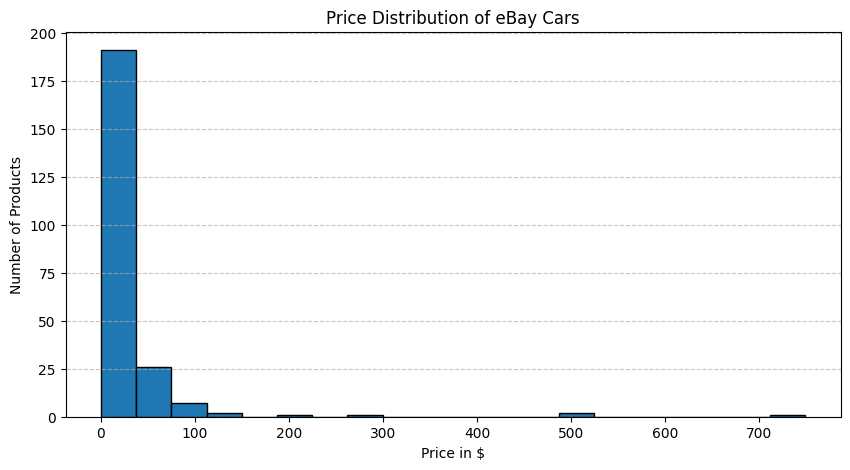

count    231.000000
mean      29.876299
std       72.017492
min        0.010000
25%        6.830000
50%       12.450000
75%       25.207500
max      749.000000
Name: price, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/samenergy/Documents/Projects/peer-group-5-webscraping/ebay_cars.csv", encoding="utf-8")

# Function to clean price values
def clean_price(price):
    price = str(price).replace("$", "").replace(",", "").strip()  # Remove symbols and whitespace
    if "to" in price:
        try:
            low, high = map(float, price.split("to"))
            return (low + high) / 2  # Average for range prices
        except ValueError:
            return None
    else:
        try:
            return float(price)
        except ValueError:
            return None

# Apply cleaning function
df["price"] = df["price"].astype(str).apply(clean_price)

# Drop NaN values in the 'price' column
df = df.dropna(subset=["price"]).reset_index(drop=True)

# Remove extreme outliers (e.g., prices > 100,000)
df = df[df["price"] < 100000]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df["price"], bins=20, edgecolor="black")
plt.xlabel("Price in $")
plt.ylabel("Number of Products")
plt.title("Price Distribution of eBay Cars")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display summary statistics
print(df["price"].describe())
